In [1]:
import pandas as pd
import numpy as np
import pickle
import joblib
from scipy.stats.mstats import gmean

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import VotingClassifier, StackingClassifier

import plotly.express as px
import plotly.graph_objects as go

In [2]:
with open('.\\Ensemble\\probXGB_sampled.pkl', 'rb') as f:
    y_pred_xgb = pickle.load(f)
    
with open('.\\Ensemble\\probLGBM_sampled.pkl', 'rb') as f:
    y_pred_lgbm = pickle.load(f)
    
with open('.\\Ensemble\\y_pred_test_knn.pkl', 'rb') as f:
    y_pred_knn = pickle.load(f)
    
with open('.\\Ensemble\\y_pred_test_LR.pkl', 'rb') as f:
    y_pred_lr = pickle.load(f)
    f.close()

In [5]:
y_pred_xgb.shape, y_pred_lgbm.shape, y_pred_knn.shape, y_pred_lr.shape

((7649,), (7649,), (7649,), (7649,))

In [31]:
df = pd.DataFrame({
    'XGBClassifier': y_pred_xgb,
    'LGBMClassifier': y_pred_lgbm,
    'KNeighborsClassifier': y_pred_knn,
    'LogisticRegression': y_pred_lr
})

In [3]:
clf_knn = joblib.load('.\\Ensemble\\best_model_KNN.pickle')

In [19]:
clf_knn

KNeighborsClassifier(n_jobs=-1, n_neighbors=9, weights='distance')

In [4]:
clf_lr = joblib.load('.\\Ensemble\\best_model_LR.pickle')
clf_lr

LogisticRegression(C=0.05623413251903491, penalty='l1', random_state=2021,
                   solver='liblinear')

In [5]:
clf_lgbm = joblib.load('.\\Ensemble\\sampledLGBM.pkl')

In [6]:
clf_lgbm

LGBMClassifier(boosting_type='dart', colsample_bytree=0.01,
               early_stopping_rounds=100, learning_rate=0.26, max_depth=19,
               num_iterations=1000, num_leaves=1023, objective='binary',
               subsample=0.51)

In [7]:
clf_xgb = joblib.load('.\\Ensemble\\sampledXGB.pkl')

In [8]:
clf_xgb

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.49, eval_metric='auc',
              gamma=0.08, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=20, min_child_weight=6.0, missing=nan,
              monotone_constraints='()', n_estimators=22, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.88, tree_method='exact',
              validate_parameters=1, verbosity=0)

In [9]:
with open('.\\Data\\X_train_sampled.pkl', 'rb') as f:
    X_train = pickle.load(f)
    
with open('.\\Data\\X_valid_scaled_rev.pkl', 'rb') as f:
    X_valid = pickle.load(f)
    
with open('.\\Data\\X_test_scaled_rev.pkl', 'rb') as f:
    X_test = pickle.load(f)
    
with open('.\\Data\\y_train_sampled.pkl', 'rb') as f:
    y_train = pickle.load(f)
    
with open('.\\Data\\y_valid.pkl', 'rb') as f:
    y_valid = pickle.load(f)
    
with open('.\\Data\\y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
    f.close()

In [10]:
y_pred_lr = clf_lr.predict_proba(X_test)[:, 1]

In [11]:
y_pred_knn = clf_knn.predict_proba(X_test)[:, 1]

In [33]:
df.corr()

XGBClassifier  LGBMClassifier  KNeighborsClassifier  \
XGBClassifier              1.000000        0.898453              0.579308   
LGBMClassifier             0.898453        1.000000              0.538440   
KNeighborsClassifier       0.579308        0.538440              1.000000   
LogisticRegression         0.716069        0.771515              0.535051   

                      LogisticRegression  
XGBClassifier                   0.716069  
LGBMClassifier                  0.771515  
KNeighborsClassifier            0.535051  
LogisticRegression              1.000000

In [45]:
y_ens = df[['XGBClassifier', 'LGBMClassifier']].apply(gmean, axis=1)

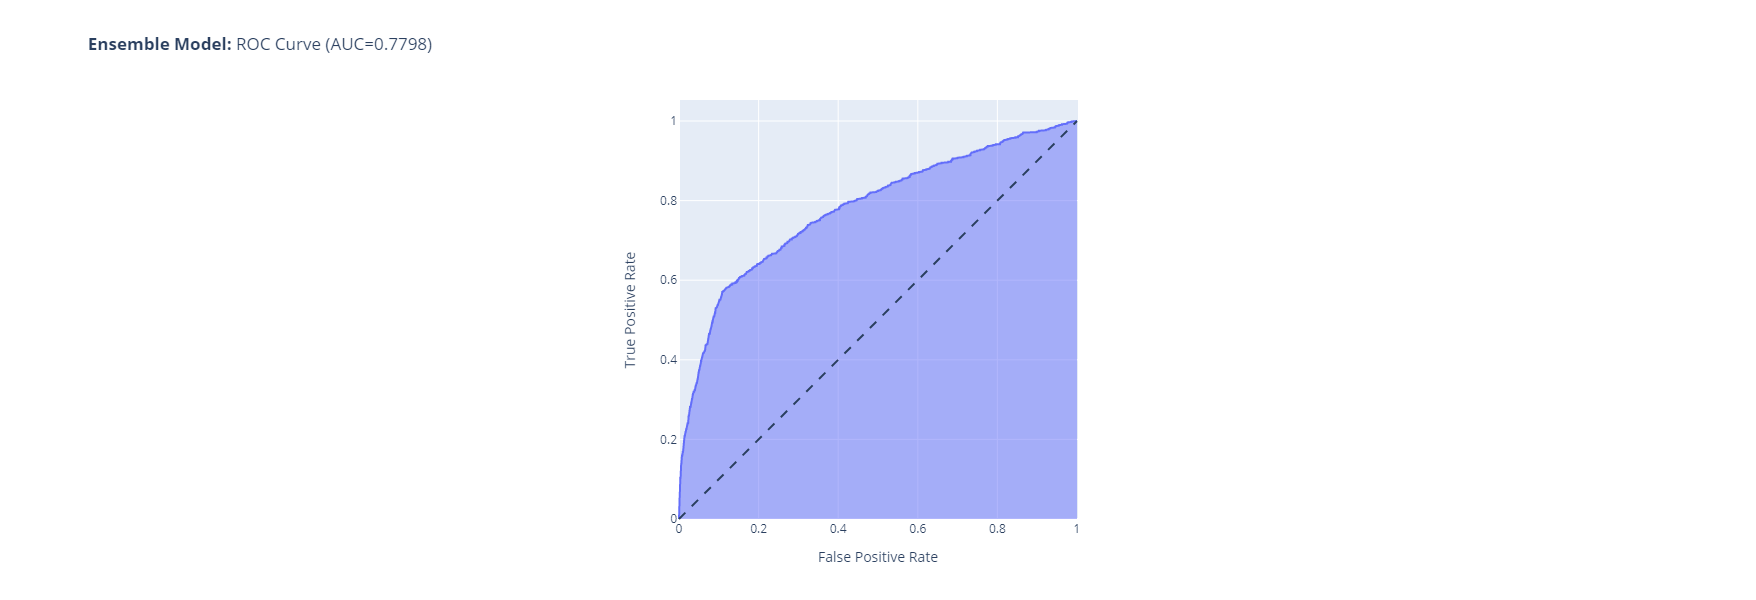

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_temp)

fig = px.area(
    x=fpr, y=tpr,
    title=f'<b>Ensemble Model:</b> ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=600, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [76]:
print(f'AUC: {auc(fpr, tpr)}')

AUC: 0.7390136896589166


In [14]:
with open('.\\Ensemble\\y_pred_test_rf.pkl', 'rb') as f:
    y_pred_rf = pickle.load(f)
    f.close()
    
clf_rf = joblib.load('.\\Ensemble\\best_model_rf.pkl')

C:\Users\chouchou\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\chouchou\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [64]:
y_pred_rf.reset_index()[0]

0       0.732813
1       0.230578
2       0.274764
3       0.300832
4       0.285560
          ...   
7644    0.709145
7645    0.565958
7646    0.403515
7647    0.219641
7648    0.510791
Name: 0, Length: 7649, dtype: float64

In [72]:
y_pred_temp

array([0.73281261, 0.23057817, 0.27476364, ..., 0.40351491, 0.21964137,
       0.51079093])

In [53]:
y_pred_rf = y_pred_rf.reset_index()[0]

In [16]:
df = pd.DataFrame({
    'XGBClassifier': y_pred_xgb,
    'LGBMClassifier': y_pred_lgbm,
    'RandomForestClassifier': y_pred_rf,
    'KNeighborsClassifier': y_pred_knn,
    'LogisticRegression': y_pred_lr
})

In [68]:
df.corr()

XGBClassifier  LGBMClassifier  RandomForestClassifier  \
XGBClassifier                1.000000        0.898453                0.854775   
LGBMClassifier               0.898453        1.000000                0.861684   
RandomForestClassifier       0.854775        0.861684                1.000000   
KNeighborsClassifier         0.579308        0.538440                0.550989   
LogisticRegression           0.716069        0.771515                0.763357   

                        KNeighborsClassifier  LogisticRegression  
XGBClassifier                       0.579308            0.716069  
LGBMClassifier                      0.538440            0.771515  
RandomForestClassifier              0.550989            0.763357  
KNeighborsClassifier                1.000000            0.535051  
LogisticRegression                  0.535051            1.000000

In [15]:
y_pred_rf = clf_rf.predict_proba(X_test)[:, 1]

In [66]:
y_pred_temp

array([0.25200845, 0.4698325 , 0.3054346 , ..., 0.81727579, 0.24845943,
       0.30062608])

In [70]:
clf_rf

RandomForestClassifier(max_features=4, max_leaf_nodes=18, n_estimators=51,
                       random_state=42)

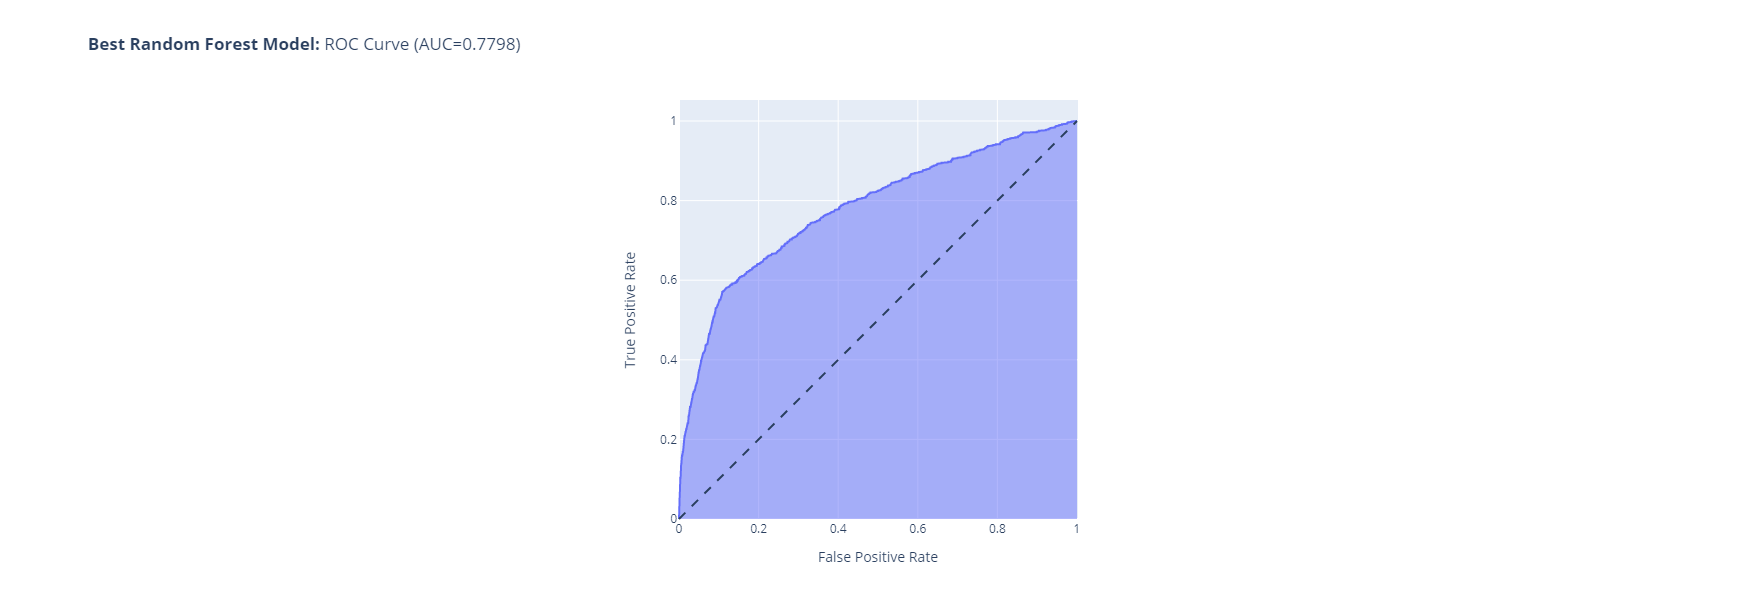

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

fig = px.area(
    x=fpr, y=tpr,
    title=f'<b>Best Random Forest Model:</b> ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=600, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [96]:
models = [
    ('LGBM', clf_lgbm),
    ('XGB', clf_xgb),
    ('RF', clf_rf),
    ('LR', clf_lr)
]

eclf = VotingClassifier(estimators=models, voting='soft')

In [98]:
eclf.fit(X_train, y_train)

C:\Users\chouchou\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

C:\Users\chouchou\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument

C:\Users\chouchou\anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning:

Early stopping is not available in dart mode



[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100


C:\Users\chouchou\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



VotingClassifier(estimators=[('LGBM',
                              LGBMClassifier(boosting_type='dart',
                                             colsample_bytree=0.01,
                                             early_stopping_rounds=100,
                                             learning_rate=0.26, max_depth=19,
                                             num_iterations=1000,
                                             num_leaves=1023,
                                             objective='binary',
                                             subsample=0.51)),
                             ('XGB',
                              XGBClassifier(base_score=0.5, booster='dart',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.49,
                                            eval_metric='...
                                            max_de

In [99]:
y_pred_ens = eclf.predict_proba(X_test)[:, 1]

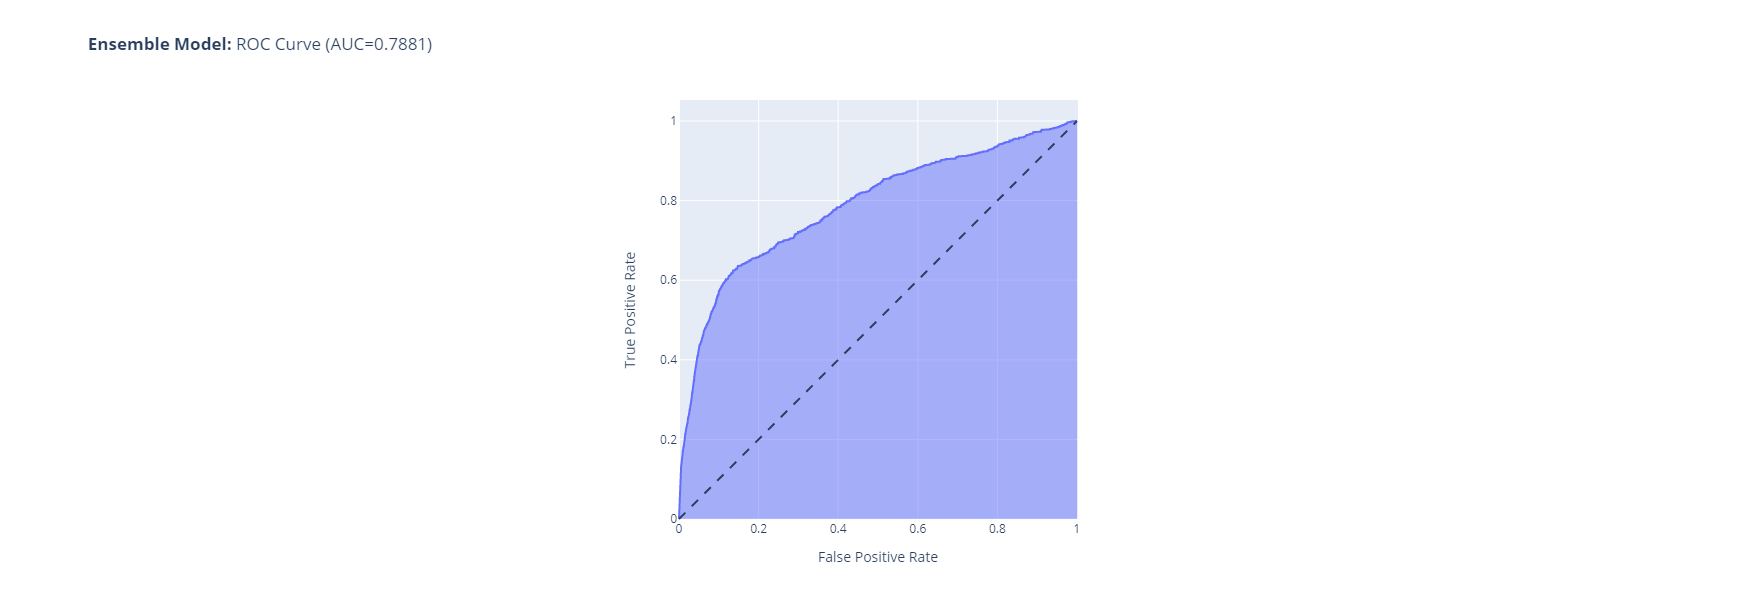

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ens)

fig = px.area(
    x=fpr, y=tpr,
    title=f'<b>Ensemble Model:</b> ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=600, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

C:\Users\chouchou\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

C:\Users\chouchou\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument

C:\Users\chouchou\anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning:

Early stopping is not available in dart mode



[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100


C:\Users\chouchou\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



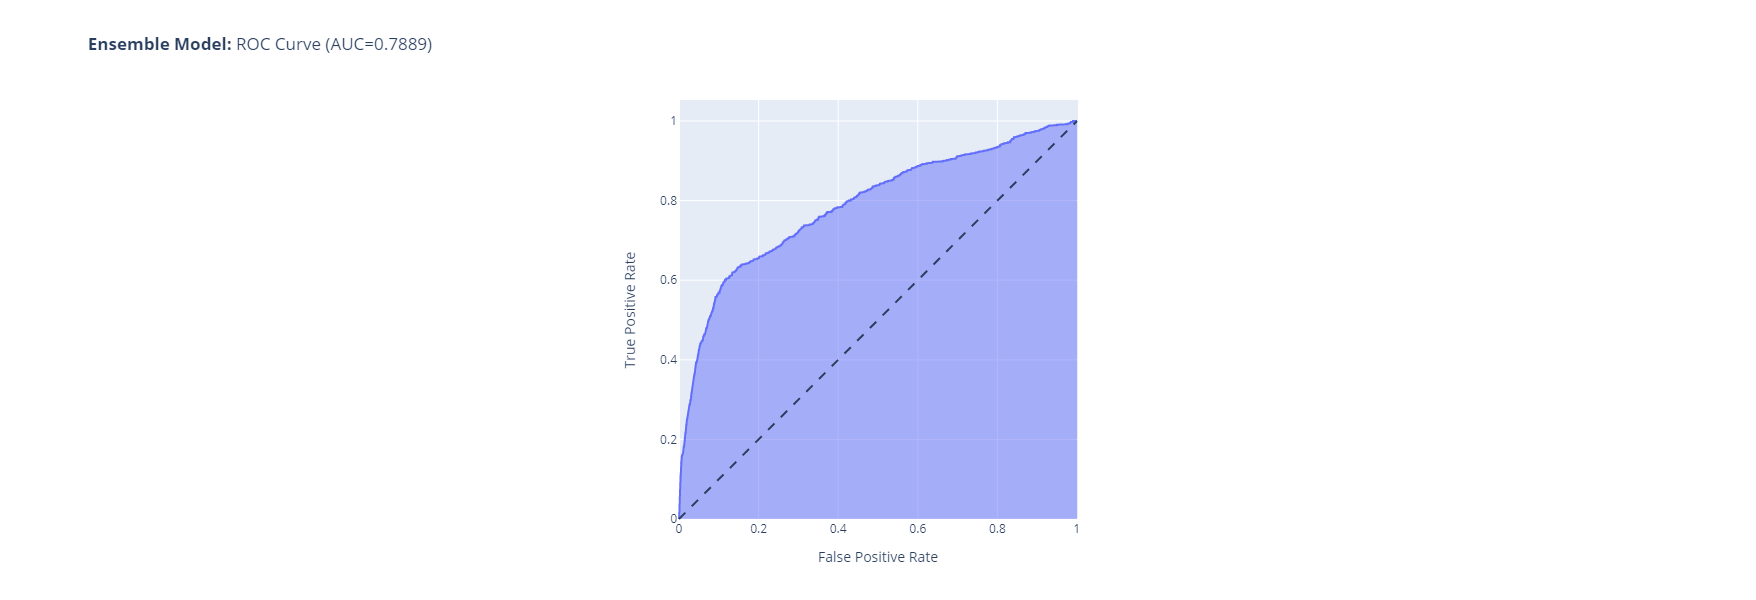

In [106]:
models = [
    ('LGBM', clf_lgbm),
    ('XGB', clf_xgb),
    ('RF', clf_rf),
    ('LR', clf_lr)
]

eclf_v2 = VotingClassifier(estimators=models, voting='soft')
eclf_v2.fit(X_train, y_train)

y_pred_ens_v2 = eclf_v2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ens_v2)

fig = px.area(
    x=fpr, y=tpr,
    title=f'<b>Ensemble Model:</b> ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=600, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [107]:
print(f'AUC: {auc(fpr, tpr)}')

AUC: 0.7889244914395823


In [101]:
models = [
    ('LGBM', clf_lgbm),
    ('XGB', clf_xgb),
    ('RF', clf_rf)
]

eclf_w = VotingClassifier(estimators=models, voting='soft', weights=[1, 1, 1])
eclf_w.fit(X_train, y_train)

C:\Users\chouchou\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

C:\Users\chouchou\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument

C:\Users\chouchou\anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning:

Early stopping is not available in dart mode



[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100


C:\Users\chouchou\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



VotingClassifier(estimators=[('LGBM',
                              LGBMClassifier(boosting_type='dart',
                                             colsample_bytree=0.01,
                                             early_stopping_rounds=100,
                                             learning_rate=0.26, max_depth=19,
                                             num_iterations=1000,
                                             num_leaves=1023,
                                             objective='binary',
                                             subsample=0.51)),
                             ('XGB',
                              XGBClassifier(base_score=0.5, booster='dart',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.49,
                                            eval_metric='...
                                            max_de

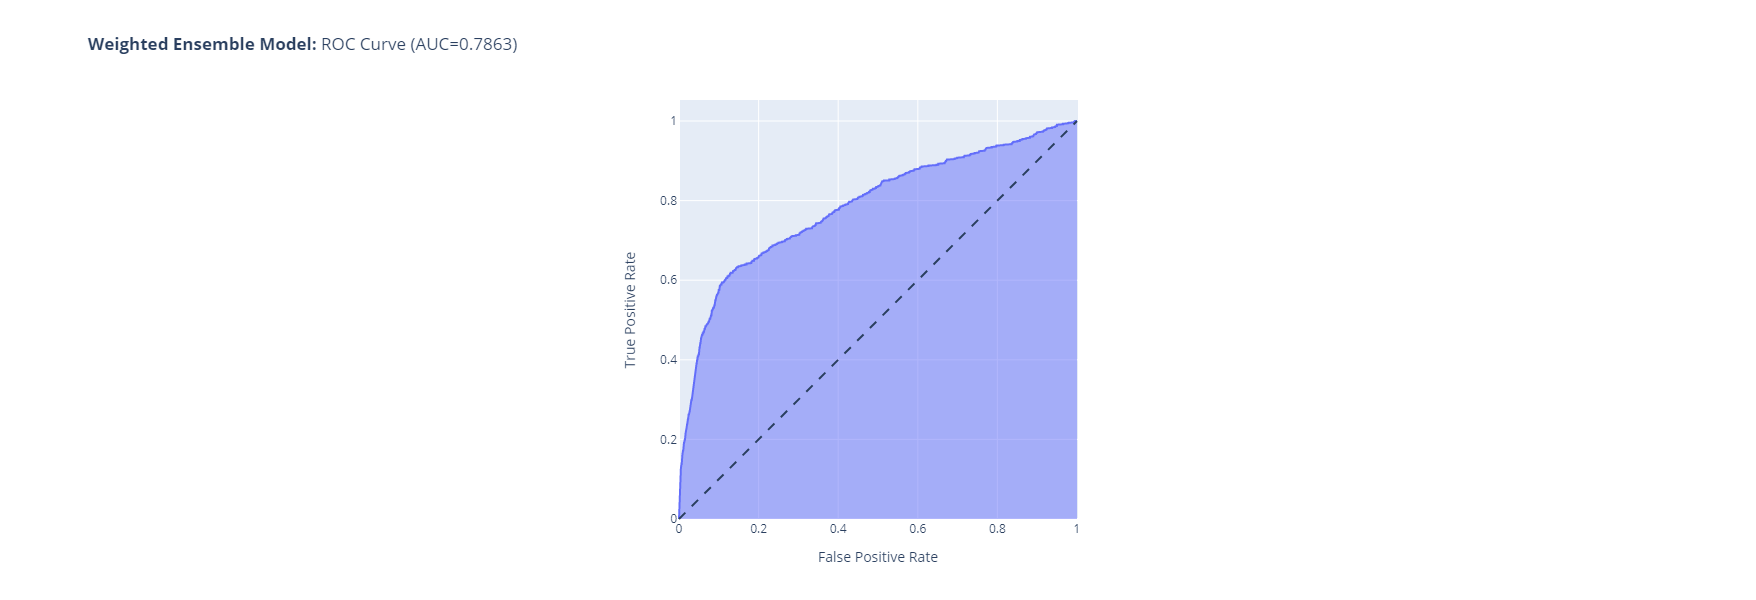

In [103]:
y_pred_ens_w = eclf_w.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ens_w)

fig = px.area(
    x=fpr, y=tpr,
    title=f'<b>Weighted Ensemble Model:</b> ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=600, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [111]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
clf_stk = StackingClassifier(estimators=models, final_estimator=clf_xgb, cv=skf, stack_method='predict_proba', n_jobs=-1, verbose=0)

In [112]:
clf_stk.fit(X_train, y_train)

C:\Users\chouchou\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



StackingClassifier(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimators=[('LGBM',
                                LGBMClassifier(boosting_type='dart',
                                               colsample_bytree=0.01,
                                               early_stopping_rounds=100,
                                               learning_rate=0.26, max_depth=19,
                                               num_iterations=1000,
                                               num_leaves=1023,
                                               objective='binary',
                                               subsample=0.51)),
                               ('XGB',
                                XGBClassifier(base_score=0.5, booster='dart',
                                              colsample_by...
                                                 importance_type='gain',
                                                 interaction_constra

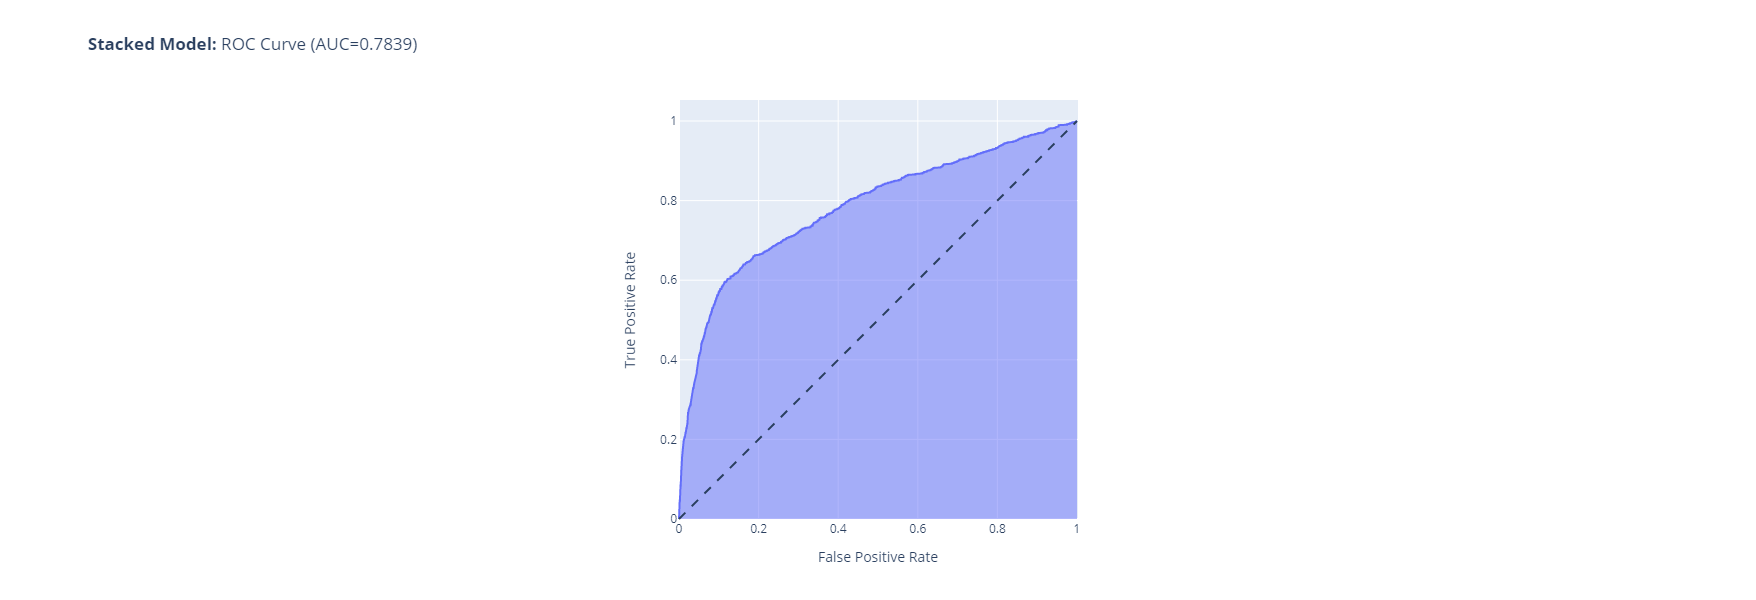

In [113]:
y_pred_stk = clf_stk.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_stk)

fig = px.area(
    x=fpr, y=tpr,
    title=f'<b>Stacked Model:</b> ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=600, height=600
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [114]:
print(f'AUC: {auc(fpr, tpr)}')

AUC: 0.7839455746550613


In [22]:
df.corr()

XGBClassifier  LGBMClassifier  RandomForestClassifier  \
XGBClassifier                1.000000        0.898453                0.854775   
LGBMClassifier               0.898453        1.000000                0.861684   
RandomForestClassifier       0.854775        0.861684                1.000000   
KNeighborsClassifier         0.579308        0.538440                0.550989   
LogisticRegression           0.716069        0.771515                0.763357   

                        KNeighborsClassifier  LogisticRegression  
XGBClassifier                       0.579308            0.716069  
LGBMClassifier                      0.538440            0.771515  
RandomForestClassifier              0.550989            0.763357  
KNeighborsClassifier                1.000000            0.535051  
LogisticRegression                  0.535051            1.000000

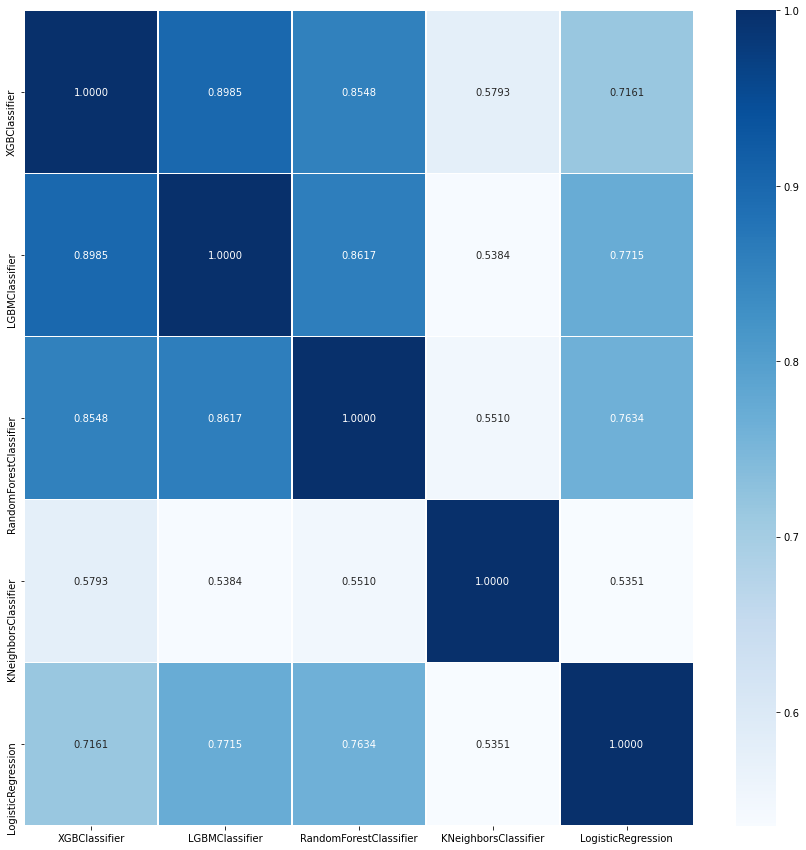

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns    


plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True, fmt='.4f', linewidths=.5, cmap='Blues')
plt.show()